# High-School Maths Exercise

In [119]:
import sympy
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3. Solving equations with Python


How about a function that takes $a, b, c$ (assume they are real numbers, you don't need to do additional checks on them) and returns the **real** roots of the quadratic equation?<br><br>

Remember that in order to calculate the roots, we first need to see whether the expression under the square root sign is non-negative.

If $b^2 - 4ac > 0$, the equation has two real roots: $x_1, x_2$

If $b^2 - 4ac = 0$, the equation has one real root: $x_1 = x_2$

If $b^2 - 4ac < 0$, the equation has zero real roots<br><br>

Write a function which returns the roots. In the first case, return a list of 2 numbers: `[2, 3]`. In the second case, return a list of only one number: `[2]`. In the third case, return an empty list: `[]`.

In [102]:
def solve_quadratic_equation(a, b, c):
  if a == 0:
    if b == 0:
      return []
    else:
      return [-c / b]

  D = b**2 - 4*a*c

  if D < 0:
    return []
  elif D == 0:
    x = -b / (2*a)
    return [x]
  else:
    sqrt_D = math.sqrt(D)
    x1 = (-b - sqrt_D) / (2*a)
    x2 = (-b + sqrt_D) / (2*a)

    return [x1, x2]

In [116]:
# Test:

assert solve_quadratic_equation(1, -3, -2) == [-0.5615528128088303, 3.5615528128088303]
assert solve_quadratic_equation(1, -8, 16) == [4]
assert solve_quadratic_equation(1, 5, 6)   == [-3, -2]
assert solve_quadratic_equation(5, 1, 6)   == []
assert solve_quadratic_equation(1, 1, 1)   == []

assert solve_quadratic_equation(0, 0, 0)   == []
assert solve_quadratic_equation(0, 0, 5)   == []
assert solve_quadratic_equation(0, 1, 1)   == [-1]

assert solve_quadratic_equation(1e6, -3e6, 2e6)   == [1, 2]
assert solve_quadratic_equation(1e-6, -3e-6, 2e-6)   == [0.9999999999999998, 2.0000000000000004]

**Bonus:** Last time we saw how to solve a linear equation. Remember that linear equations are just like quadratic equations with $a = 0$. In this case, however, division by 0 will throw an error. Extend your function above to support solving linear equations (in the same way we did it last time).

**Bonus 2:** Actually, every quadratic equation (with a non-zero leading term $a$) has exactly two solutions. Find out what they are, why there are two of them, and how to compute them. If you've followed the steps outlined above, _you should add a single letter_ somewhere in your code to always obtain the two solutions to the quadratic equation.

In [ ]:
# Write your code here. Of course, you may add more cells if needed.

### Problem 5. Equation of a Line

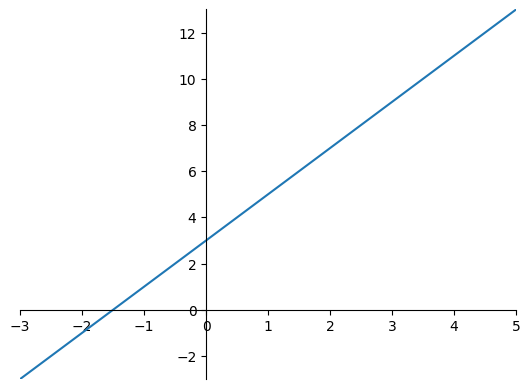

In [142]:
x = np.linspace(-3, 5, 10)
y = 2 * x + 3

plt.plot(x, y)
res = plt.xlim([-3, 5])
plt.ylim([y[0], y[-1]])

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

### * Problem 6. Linearizing Functions
Why is the line equation so useful? The main reason is because it's so easy to work with. Scientists actually try their best to linearize functions, that is, to make linear functions from non-linear ones. There are several ways of doing this. One of them involves derivatives and we'll talk about it later in the course.

A commonly used method for linearizing functions is through algebraic transformations. Try to linearize
$$ y = ae^{bx} $$

Hint: The inverse operation of $e^{x}$ is $\ln(x)$. Start by taking $\ln$ of both sides and see what you can do. Your goal is to transform the function into another, linear function. You can look up more hints on the Internet :).

<p style="color: #d9534f">Write your result here.</p>

In [149]:
def linearize_equation(a, b, x_values):
    """
    Linearizes the equation y = ae^(bx) for an array of x values.

    Parameters:
    a (float): The coefficient for the exponential term.
    b (float): The exponent coefficient.
    x_values (array-like): The x values for which to calculate the linearized y values.

    Returns:
    array-like: The linearized y values.
    """
    Y = np.log(a) + b * x_values
    return Y

# Example usage:
a = 2  # Example value
b = 3  # Example value
x = 4
ln_y2 = linearize_equation(a, b, x)

print(ln_y2)
print(np.log(2))

12.693147180559945
0.6931471805599453


### * Problem 7. Generalizing the Plotting Function
Let's now use the power of Python to generalize the code we created to plot. In Python, you can pass functions as parameters to other functions. We'll utilize this to pass the math function that we're going to plot.

Note: We can also pass *lambda expressions* (anonymous functions) like this:
```python
lambda x: x + 2```
This is a shorter way to write
```python
def some_anonymous_function(x):
    return x + 2
```

We'll also need a range of x values. We may also provide other optional parameters which will help set up our plot. These may include titles, legends, colors, fonts, etc. Let's stick to the basics now.

Write a Python function which takes another function, x range and number of points, and plots the function graph by evaluating it at every point.

**BIG hint:** If you want to use not only `numpy` functions for `f` but any one function, a very useful (and easy) thing to do, is to vectorize the function `f` (e.g. to allow it to be used with `numpy` broadcasting):
```python
f_vectorized = np.vectorize(f)
y = f_vectorized(x)
```

In [ ]:
def plot_math_function(f, min_x, max_x, num_points):
    # Write your code here
    pass

In [ ]:
plot_math_function(lambda x: 2 * x + 3, -3, 5, 1000)
plot_math_function(lambda x: -x + 8, -1, 10, 1000)
plot_math_function(lambda x: x**2 - x - 2, -3, 4, 1000)
plot_math_function(lambda x: np.sin(x), -np.pi, np.pi, 1000)
plot_math_function(lambda x: np.sin(x) / x, -4 * np.pi, 4 * np.pi, 1000)

### * Problem 8. Solving Equations Graphically
Now that we have a general plotting function, we can use it for more interesting things. Sometimes we don't need to know what the exact solution is, just to see where it lies. We can do this by plotting the two functions around the "=" sign ans seeing where they intersect. Take, for example, the equation $2x + 3 = 0$. The two functions are $f(x) = 2x + 3$ and $g(x) = 0$. Since they should be equal, the point of their intersection is the solution of the given equation. We don't need to bother marking the point of intersection right now, just showing the functions.

To do this, we'll need to improve our plotting function yet once. This time we'll need to take multiple functions and plot them all on the same graph. Note that we still need to provide the $[x_{min}; x_{max}]$ range and it's going to be the same for all functions.

```python
vectorized_fs = [np.vectorize(f) for f in functions]
ys = [vectorized_f(x) for vectorized_f in vectorized_fs]
```

In [ ]:
def plot_math_functions(functions, min_x, max_x, num_points):
    # Write your code here
    pass

In [ ]:
plot_math_functions([lambda x: 2 * x + 3, lambda x: 0], -3, 5, 1000)
plot_math_functions([lambda x: 3 * x**2 - 2 * x + 5, lambda x: 3 * x + 7], -2, 3, 1000)

This is also a way to plot the solutions of systems of equation, like the one we solved last time. Let's actually try it.

In [ ]:
plot_math_functions([lambda x: (-4 * x + 7) / 3, lambda x: (-3 * x + 8) / 5, lambda x: (-x - 1) / -2], -1, 4, 1000)

### Problem 9. Trigonometric Functions
We already saw the graph of the function $y = \sin(x)$. But then again, how do we define the trigonometric functions? Let's quickly review that.

![Right triangle](angle-in-right-triangle.png)

The two basic trigonometric functions are defined as the ratio of two sides:
$$ \sin(x) = \frac{\text{opposite}}{\text{hypotenuse}} $$
$$ \cos(x) = \frac{\text{adjacent}}{\text{hypotenuse}} $$

And also:
$$ \tan(x) = \frac{\text{opposite}}{\text{adjacent}} = \frac{\sin(x)}{\cos(x)} $$
$$ \cot(x) = \frac{\text{adjacent}}{\text{opposite}} = \frac{\cos(x)}{\sin(x)} $$

This is fine, but using this, "right-triangle" definition, we're able to calculate the trigonometric functions of angles up to $90^\circ$. But we can do better. Let's now imagine a circle centered at the origin of the coordinate system, with radius $r = 1$. This is called a "unit circle".

![Trigonometric unit circle](triangle-unit-circle.png)

We can now see exactly the same picture. The $x$-coordinate of the point in the circle corresponds to $\cos(\alpha)$ and the $y$-coordinate - to $\sin(\alpha)$. What did we get? We're now able to define the trigonometric functions for all degrees up to $360^\circ$. After that, the same values repeat: these functions are **periodic**:
$$ \sin(k.360^\circ + \alpha) = \sin(\alpha), k = 0, 1, 2, \dots $$
$$ \cos(k.360^\circ + \alpha) = \cos(\alpha), k = 0, 1, 2, \dots $$

We can, of course, use this picture to derive other identities, such as:
$$ \sin(90^\circ + \alpha) = \cos(\alpha) $$

A very important property of the sine and cosine is that they accept values in the range $(-\infty; \infty)$ and produce values in the range $[-1; 1]$. The two other functions take values in the range $(-\infty; \infty)$ **except when their denominators are zero** and produce values in the same range.

#### Radians
A degree is a geometric object, $1/360$th of a full circle. This is quite inconvenient when we work with angles. There is another, natural and intrinsic measure of angles. It's called the **radian** and can be written as $\text{rad}$ or without any designation, so $\sin(2)$ means "sine of two radians".

![Radian definition](radian.gif)

It's defined as *the central angle of an arc with length equal to the circle's radius* and $1\text{rad} \approx 57.296^\circ$.

We know that the circle circumference is $C = 2\pi r$, therefore we can fit exactly $2\pi$ arcs with length $r$ in $C$. The angle corresponding to this is $360^\circ$ or $2\pi\ \text{rad}$. Also, $\pi \text{rad} = 180^\circ$.

(Some people prefer using $\tau = 2\pi$ to avoid confusion with always multiplying by 2 or 0.5 but we'll use the standard notation here.)

**NOTE:** All trigonometric functions in `math` and `numpy` accept radians as arguments. In order to convert between radians and degrees, you can use the relations $\text{[deg]} = 180/\pi.\text{[rad]}, \text{[rad]} =  \pi/180.\text{[deg]}$. This can be done using `np.deg2rad()` and `np.rad2deg()` respectively.

#### Inverse trigonometric functions
All trigonometric functions have their inverses. If you plug in, say $\pi/4$ in the $\sin(x)$ function, you get $\sqrt{2}/2$. The inverse functions (also called, arc-functions) take arguments in the interval $[-1; 1]$ and return the angle that they correspond to. Take arcsine for example:
$$ \arcsin(y) = x: sin(x) = y $$
$$ \arcsin\left(\frac{\sqrt{2}}{2}\right) = \frac{\pi}{4} $$

Please note that this is NOT entirely correct. From the relations we found:
$$\sin(x) = sin(2k\pi + x), k = 0, 1, 2, \dots $$

it follows that $\arcsin(x)$ has infinitely many values, separated by $2k\pi$ radians each:
$$ \arcsin\left(\frac{\sqrt{2}}{2}\right) = \frac{\pi}{4} + 2k\pi, k = 0, 1, 2, \dots $$

In most cases, however, we're interested in the first value (when $k = 0$). It's called the **principal value**.

Note 1: There are inverse functions for all four basic trigonometric functions: $\arcsin$, $\arccos$, $\arctan$, $\text{arccot}$. These are sometimes written as $\sin^{-1}(x)$, $\cos^{-1}(x)$, etc. These definitions are completely equivalent.

Just notice the difference between $\sin^{-1}(x) := \arcsin(x)$ and $\sin(x^{-1}) = \sin(1/x)$.

#### Exercise
Use the plotting function you wrote above to plot the inverse trigonometric functions. Use `numpy` (look up how to use inverse trigonometric functions).

In [ ]:
# Write your code here

### * Problem 10. Perlin Noise
This algorithm has many applications in computer graphics and can serve to demonstrate several things... and help us learn about math, algorithms and Python :).
#### Noise
Noise is just random values. We can generate noise by just calling a random generator. Note that these are actually called *pseudorandom generators*. We'll talk about this later in this course.
We can generate noise in however many dimensions we want. For example, if we want to generate a single dimension, we just pick N random values and call it a day. If we want to generate a 2D noise space, we can take an approach which is similar to what we already did with `np.meshgrid()`.

$$ \text{noise}(x, y) = N, N \in [n_{min}, n_{max}] $$

This function takes two coordinates and returns a single number N between $n_{min}$ and $n_{max}$. (This is what we call a "scalar field").

Random variables are always connected to **distributions**. We'll talk about these a great deal but now let's just say that these define what our noise will look like. In the most basic case, we can have "uniform noise" - that is, each point in our little noise space $[n_{min}, n_{max}]$ will have an equal chance (probability) of being selected.

#### Perlin noise
There are many more distributions but right now we'll want to have a look at a particular one. **Perlin noise** is a kind of noise which looks smooth. It looks cool, especially if it's colored. The output may be tweaked to look like clouds, fire, etc. 3D Perlin noise is most widely used to generate random terrain.

#### Algorithm
... Now you're on your own :). Research how the algorithm is implemented (note that this will require that you understand some other basic concepts like vectors and gradients).

#### Your task
1. Research about the problem. See what articles, papers, Python notebooks, demos, etc. other people have created
2. Create a new notebook and document your findings. Include any assumptions, models, formulas, etc. that you're using
3. Implement the algorithm. Try not to copy others' work, rather try to do it on your own using the model you've created
4. Test and improve the algorithm
5. (Optional) Create a cool demo :), e.g. using Perlin noise to simulate clouds. You can even do an animation (hint: you'll need gradients not only in space but also in time)
6. Communicate the results

Hint: [This](http://flafla2.github.io/2014/08/09/perlinnoise.html) is a very good resource. It can show you both how to organize your notebook (which is important) and how to implement the algorithm.

<h1>test</h1>
<h2>test2</h1>
<p style="color: #FDFDFD">hello</p>
<div style="border: 1px solid black; padding: 10px; display: inline-block;">help</div>